In [2]:

import numpy as np
import os 
import pandas as pd
#from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import ensemble, tree, linear_model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr
#import pyodbc
import seaborn as sns
sns.set()
#plt.style.use('seaborn')
import re
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ks_2samp
from scipy.stats import norm
#import missingno as msno
import warnings
import datetime
warnings.filterwarnings("ignore")
import nltk
#nltk.download('popular')
nltk.download('punkt')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Analysis and Visualization Script

## Setup and Imports
1. **Install Packages**:
   - Imports necessary libraries for data processing, visualization, and statistical analysis.

2. **Import Libraries**:
   - Includes `numpy`, `pandas`, `matplotlib`, `seaborn`, `sklearn`, `scipy`, `statsmodels`, and `nltk`.

## Data Loading and Initial Processing
3. **Load Data**:
   - Loads data from a pickle file into `df_panel`.
   - Extracts a subset of columns into `df_eda` for analysis.

4. **Inspect Data**:
   - Prints information about `df_panel` and `df_eda`.

## Data Analysis and Visualization
5. **Export Data Information**:
   - Saves data type information, maximum and minimum values, and missing values to CSV files.

6. **AutoViz Visualization**:
   - Uses `AutoViz` to create visualizations for `df_eda`.

7. **Count Plots**:
   - Creates count plots for dummy and categorical columns.

8. **Histograms**:
   - Plots histograms for numerical columns and log-transformed price.

9. **Correlation Heatmap**:
   - Computes and visualizes a correlation heatmap for numerical columns.

10. **Scatter Plots**:
    - Creates scatter plots to show the relationship between numerical features and price.

11. **Bar Plots**:
    - Plots average price by categorical features using bar plots.

## Statistical Analysis
12. **Skewness Highlighting**:
    - Highlights skewness in numerical data using custom styling in pandas DataFrame.






In [3]:
df_panel = pd.read_pickle('df_panel.pkl')
df_panel.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12583 entries, 65536 to 456958
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Listing ID             12583 non-null  int64         
 1   Listing Name           12560 non-null  string        
 2   Host ID                12583 non-null  int64         
 3   Host Name              12572 non-null  string        
 4   Host Since             12572 non-null  datetime64[ns]
 5   Host Response Time     7307 non-null   string        
 6   Host Response Rate     7307 non-null   float64       
 7   neighbourhood          12583 non-null  string        
 8   Neighborhood Group     12583 non-null  string        
 9   City                   12580 non-null  string        
 10  Country Code           12583 non-null  string        
 11  Latitude               12583 non-null  float64       
 12  Longitude              12583 non-null  float64       
 13  P

In [4]:


df_eda= df_panel[[ 

    'Host Response Time', 
    'Host Response Rate',
    'neighbourhood', 
    'Neighborhood Group', 
    'City', 
    'Country Code',
    'Room Type', 
    'Accomodates',
    'Bathrooms', 
    'Bedrooms', 
    'Beds', 
    'Price',
    'Guests Included', 
    'Min Nights', 
    'Reviews', 
    'Overall Rating', 
    'Accuracy Rating',
    'Cleanliness Rating', 
    'Checkin Rating', 
    'Communication Rating',
    'Location Rating', 
    'Value Rating', 
    'Is Superhost_ind',
    'Is Exact Location_ind', 
  #  'Instant Bookable_ind', 
    'Top10Neighbourhood', 
    'Property Type_groups']]




#dates fileds 
 #   'Host Since', 
 #   'First Review',
 #   'Last Review', 
#category fildes with high cardinality
 #   'Latitude', 
 #   'Longitude', 
 #   'Postal Code_n',
 #   'Property Type', 
 #   'Listing ID', 
 #   'Listing Name', 
 #   'Host ID', 
 #   'Host Name',

# Get only the numerical columns
numerical_df = df_panel.select_dtypes(include=['number'])

In [5]:
# Type of values
df_panel.dtypes.to_csv("AirBnB_dtypes.csv",index=False)
# Maximum valaues 
# Maximum valaues 
numerical_df.max().to_csv("max_AirBnB.csv",index=False)
# Minimum Values
numerical_df.min().to_csv("min_AirBnB.csv",index=False)
# Missing Values
df_panel.isnull().sum(axis=0).to_csv("numerical_df.csv",index=False)
# exporting results to the protocol
df_panel.nunique().to_csv("unique_AirBnB.csv",index=False)
print(df_panel.shape)
df_eda.info()

(12583, 37)
<class 'pandas.core.frame.DataFrame'>
Index: 12583 entries, 65536 to 456958
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Host Response Time     7307 non-null   string 
 1   Host Response Rate     7307 non-null   float64
 2   neighbourhood          12583 non-null  string 
 3   Neighborhood Group     12583 non-null  string 
 4   City                   12580 non-null  string 
 5   Country Code           12583 non-null  string 
 6   Room Type              12583 non-null  string 
 7   Accomodates            12583 non-null  float64
 8   Bathrooms              12569 non-null  float64
 9   Bedrooms               12574 non-null  float64
 10  Beds                   12574 non-null  float64
 11  Price                  12583 non-null  float64
 12  Guests Included        12583 non-null  int64  
 13  Min Nights             12583 non-null  float64
 14  Reviews                12583 non-null  int

In [6]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


Shape of your Data Set loaded: (6267, 26)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Host Response Time of type=string is not classified
neighbourhood of type=string is not classified
Neighborhood Group of type=string is not classified
City of type=string is not classified
Country Code of type=string is not classified
Room Type of type=string is not classified
Is Superhost_ind of type=Int64 is not classified
Is Exact Location_ind of type=Int64 is not classified
Top10Neighbourhood of type=string is not classified
    Number of Numeric Columns =  14
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Num

Number of All Scatter Plots = 105


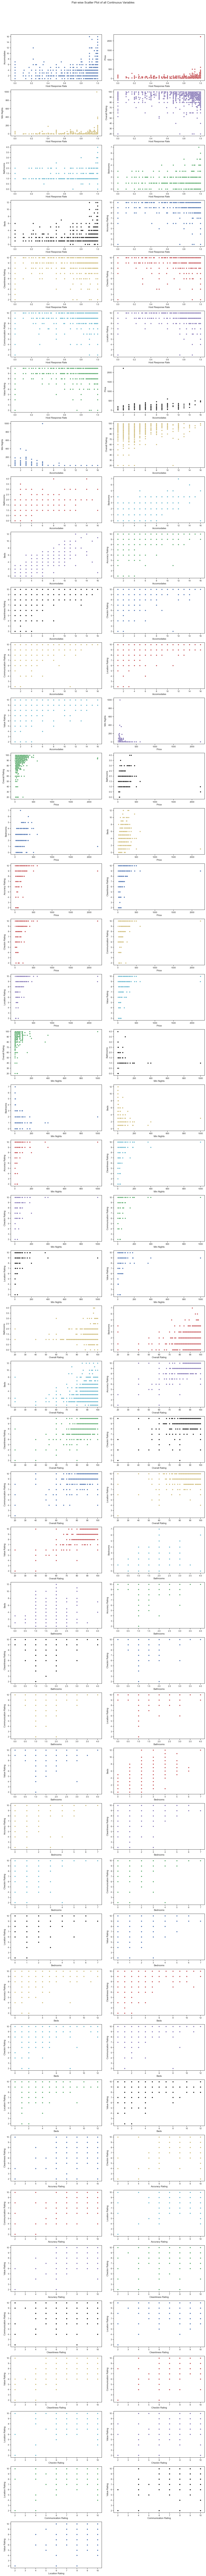

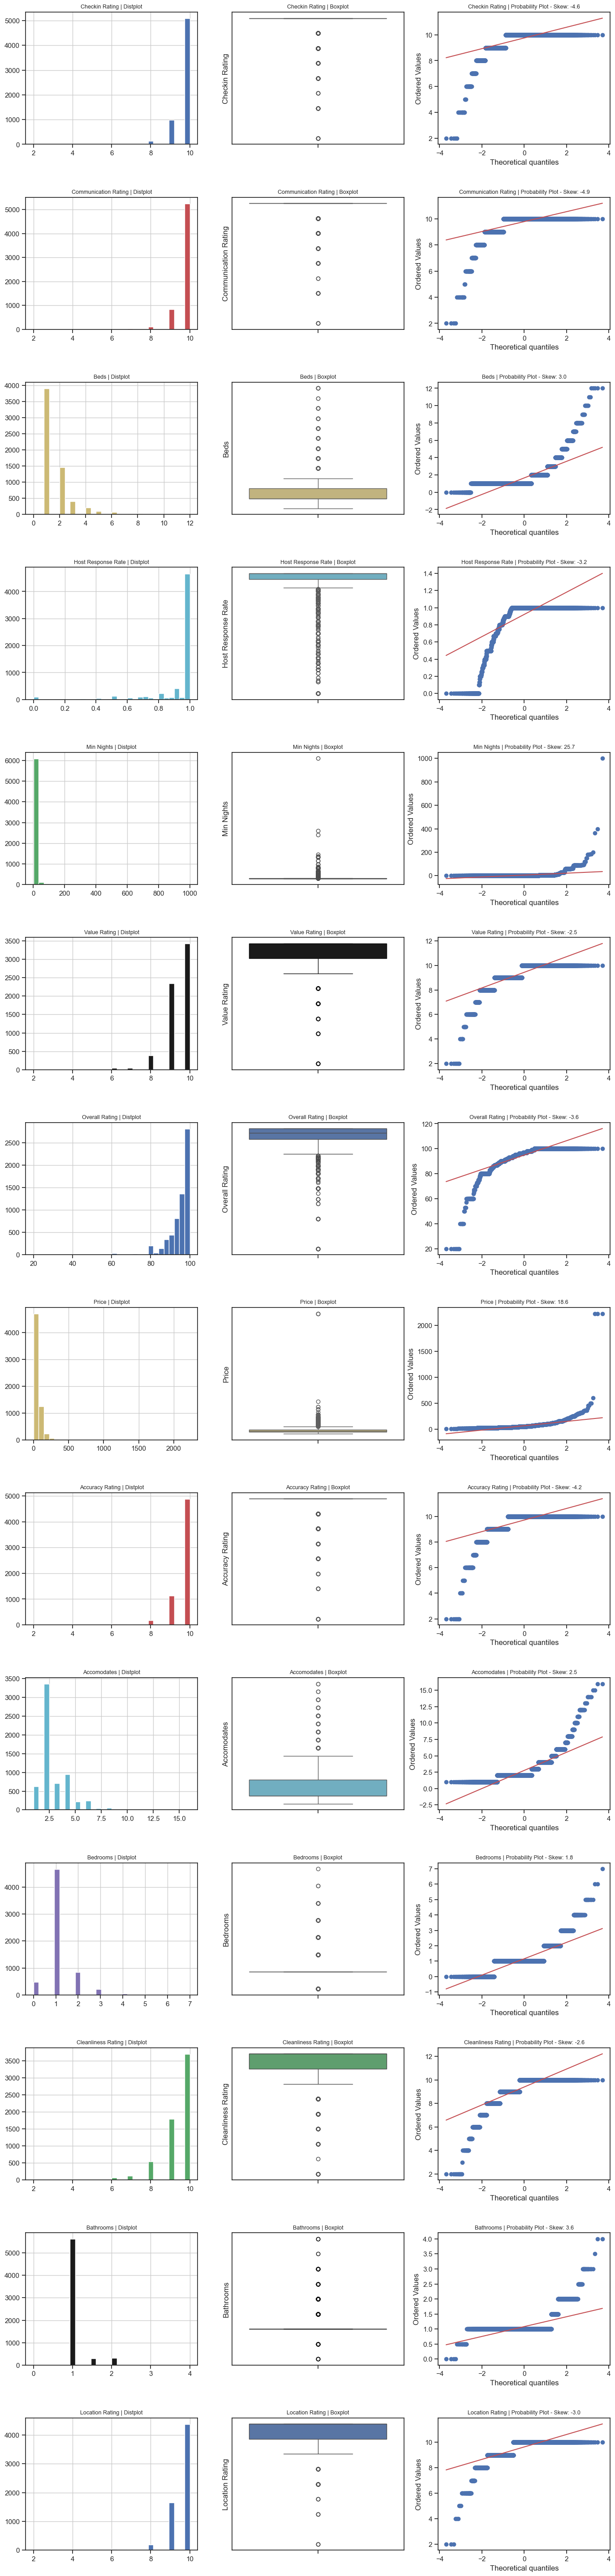

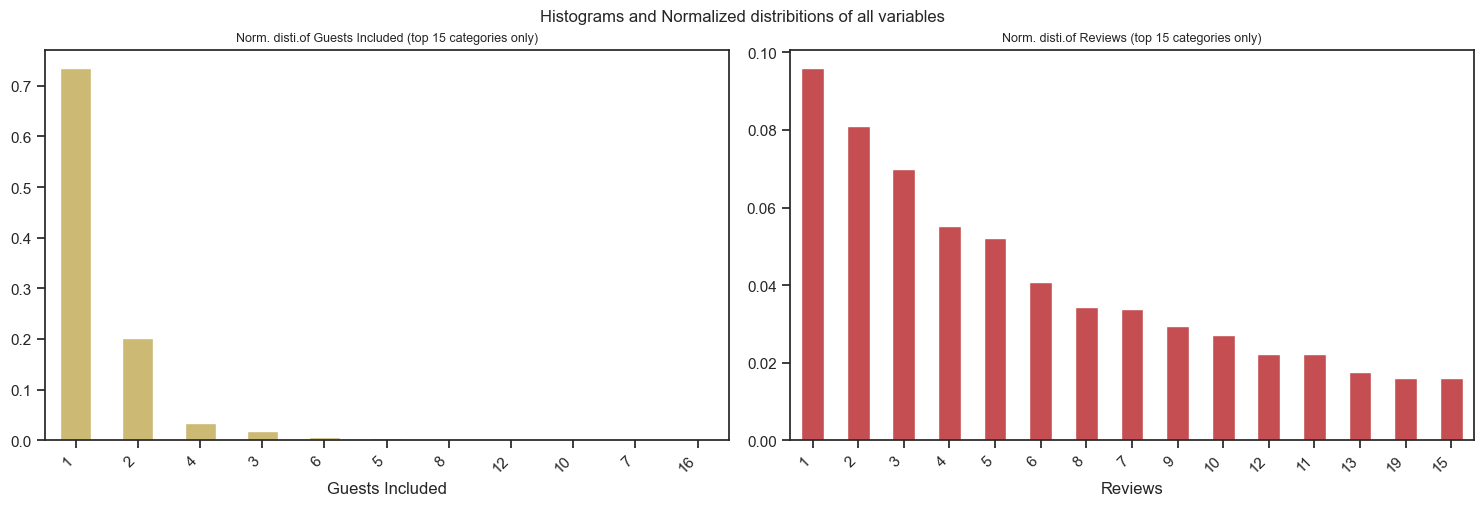

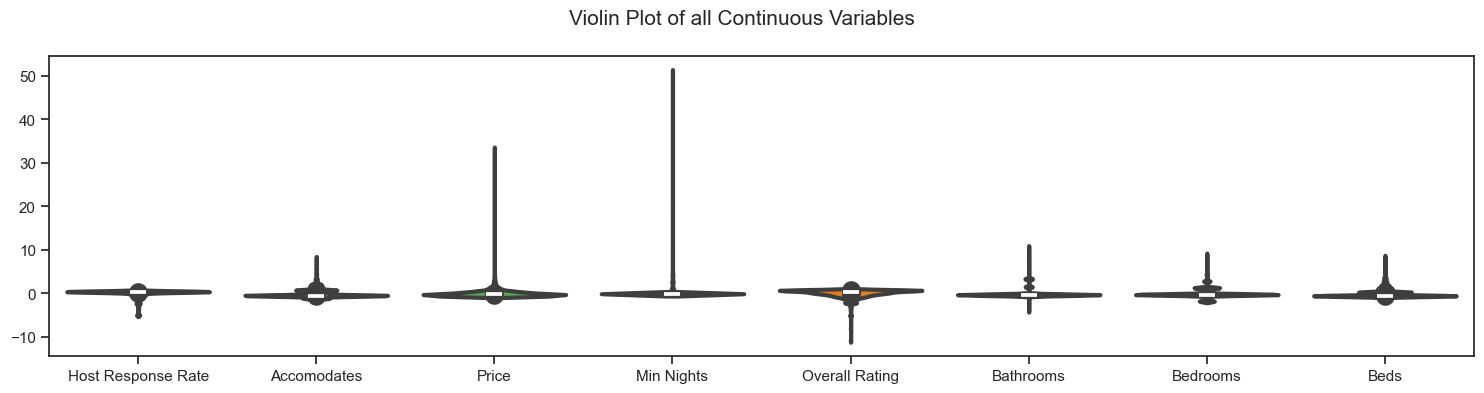

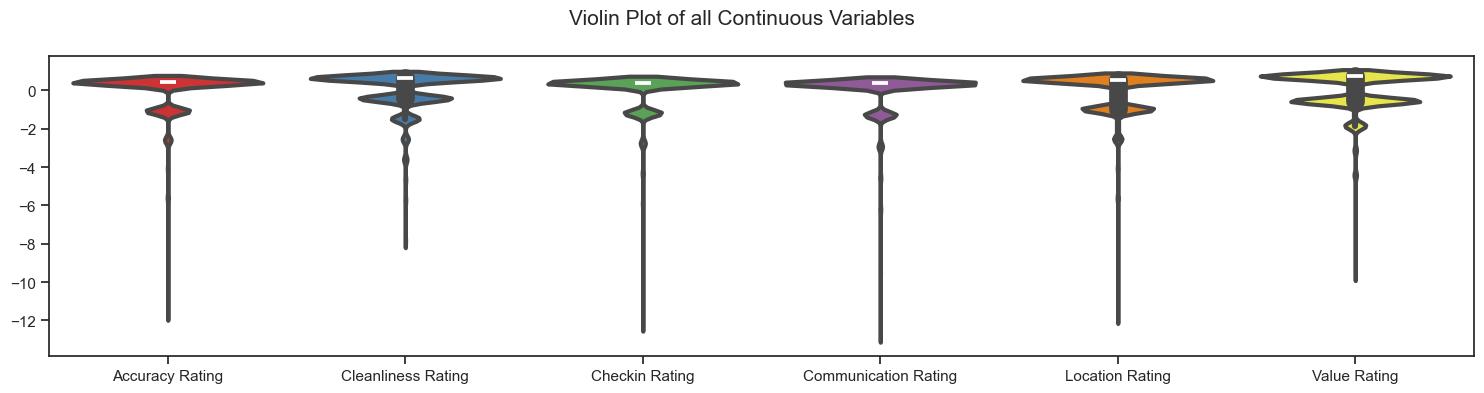

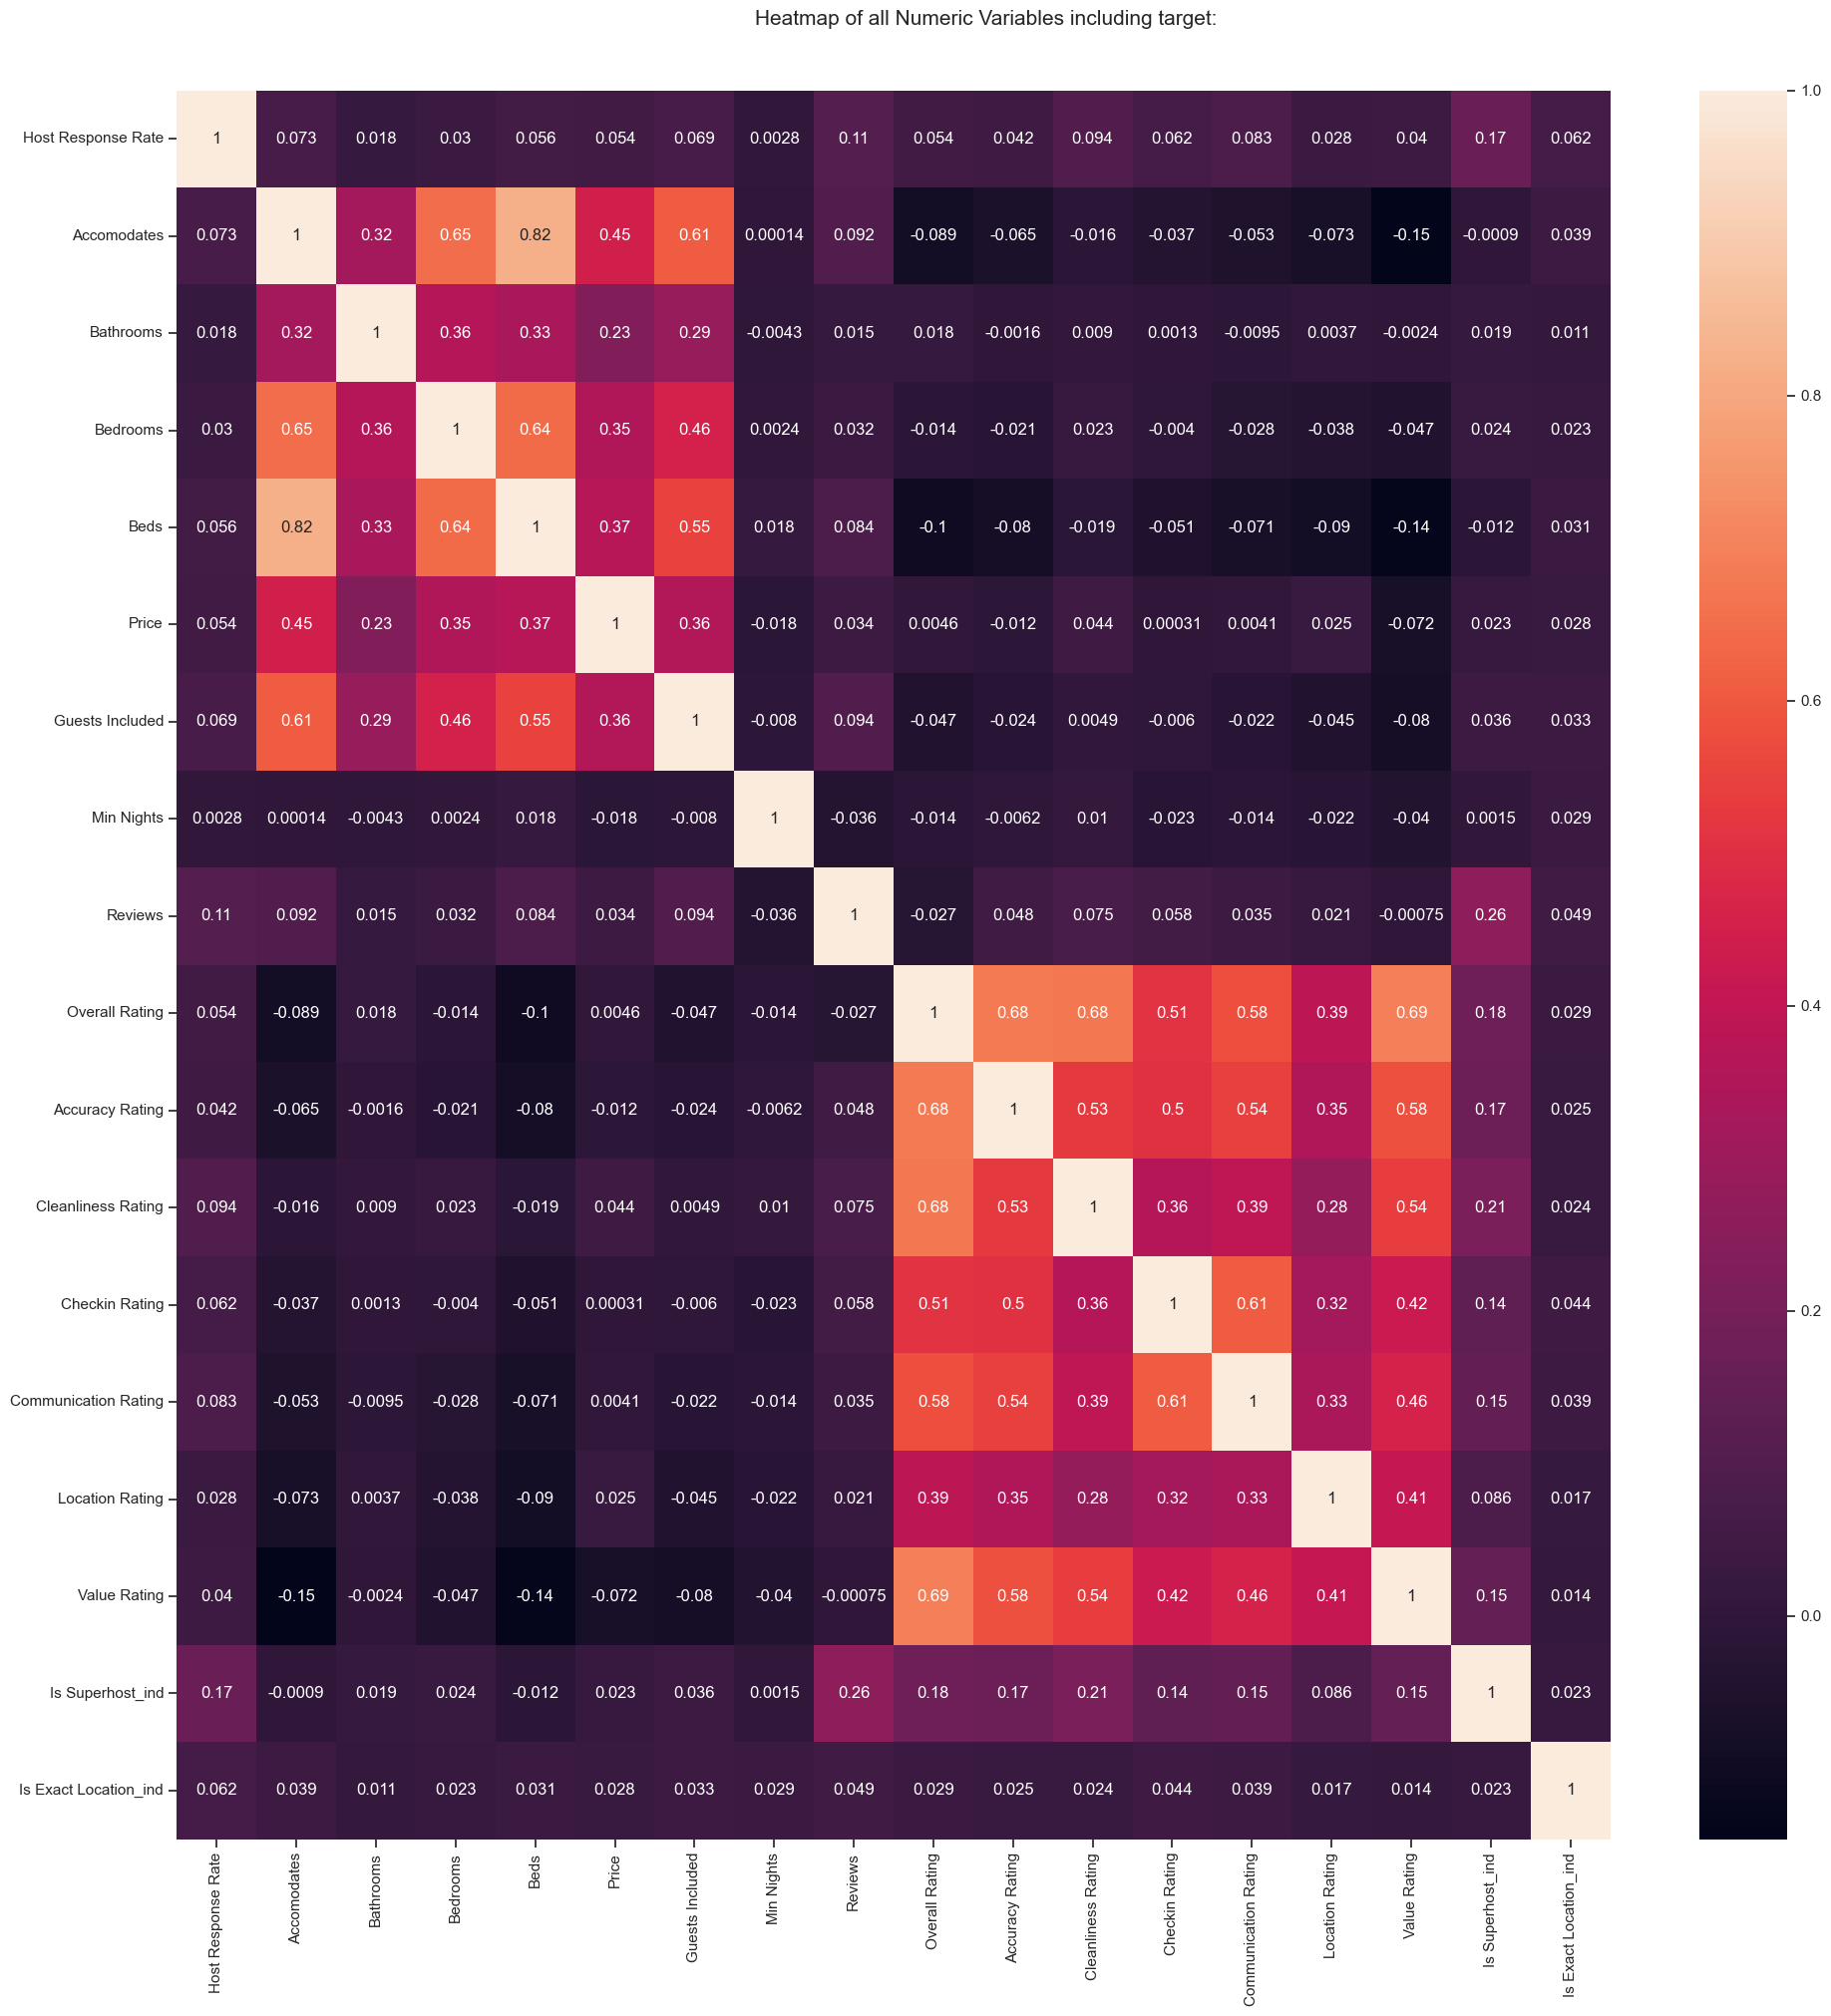

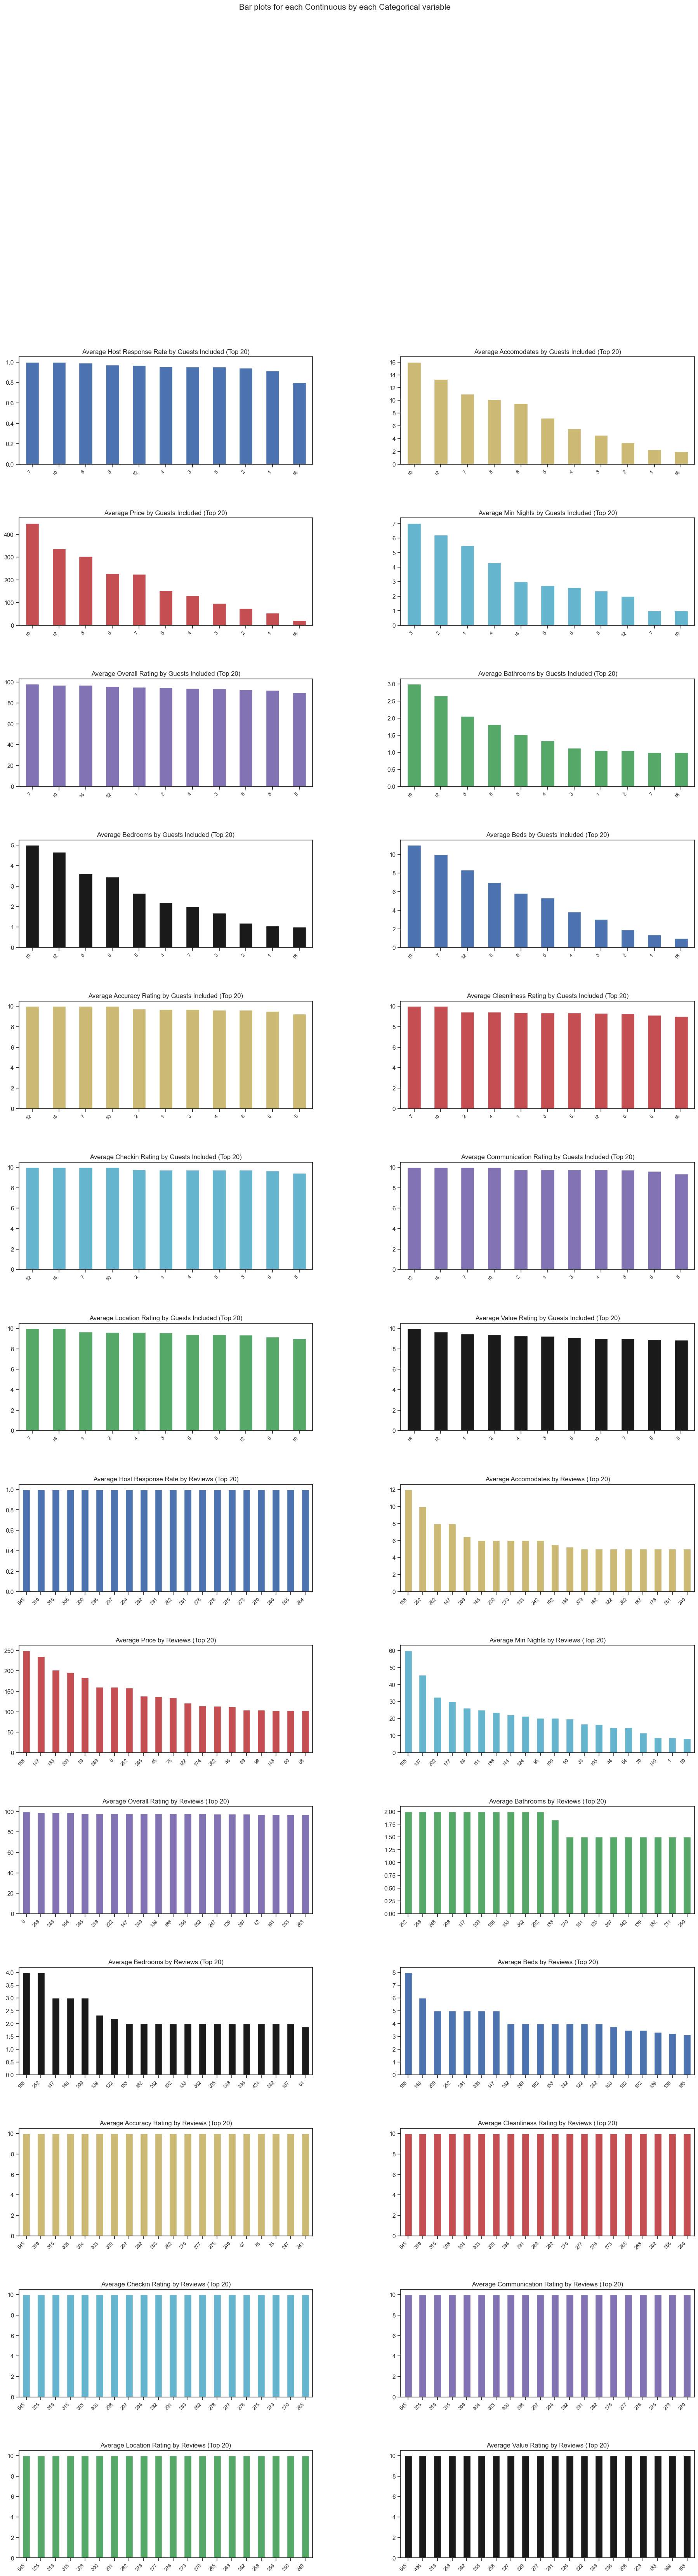

All Plots done
Time to run AutoViz = 37 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


Host Response Time  Host Response Rate  neighbourhood    \
65536   within a few hours         1.00                   Mitte   
65637       within an hour         0.99               NeukÃ¶lln   
65724         within a day         0.70               Kreuzberg   
65771   within a few hours         1.00            PlÃ¤nterwald   
65790       within an hour         1.00               NeukÃ¶lln   
...                    ...                 ...              ...   
456392        within a day         1.00         Prenzlauer Berg   
456503      within an hour         1.00         Prenzlauer Berg   
456576        within a day         1.00         Prenzlauer Berg   
456605      within an hour         1.00               Kreuzberg   
456958  within a few hours         1.00                 Wedding   

           Neighborhood Group      City  Country Code    Room Type      \
65536                      Mitte  Berlin      DE       Entire home/apt   
65637                  NeukÃ¶lln  Berlin      DE       Entire home/apt   
65724   Friedrichshain-Kreuzberg  Berlin      DE          Private room   
65771        Treptow - KÃ¶penick  Berlin      DE       Entire home/apt   
65790                  NeukÃ¶lln  Berlin      DE          Private room   
...                          ...     ...          ...              ...   
456392                    Pankow  Berlin      DE       Entire home/apt   
456503                    Pankow  Berlin      DE       Entire home/apt   
456576                    Pankow  Berlin      DE       Entire home/apt   
456605  Friedrichshain-Kreuzberg  Berlin      DE       Entire home/apt   
456958                     Mitte  Berlin      DE       Entire home/apt   

        Accomodates  Bathrooms  Bedrooms  Beds  Price  Guests Included  \
65536       6.0         1.0        2.0     4.0  109.0         2          
65637       4.0         1.0        0.0     2.0   72.0         1          
65724       3.0         1.0        2.0     3.0   39.0         1          
65771       3.0         1.0        1.0     2.0   50.0         1          
65790       2.0         1.0        1.0     1.0   54.0         2          
...             ...        ...       ...   ...    ...              ...   
456392      4.0         1.0        1.0     2.0   70.0         1          
456503      5.0         1.0        2.0     3.0   92.0         4          
456576      7.0         2.5        4.0     7.0  180.0         5          
456605      4.0         1.0        1.0     3.0   60.0         2          
456958      2.0         2.0        1.0     1.0   80.0         2          

        Min Nights  Reviews  Overall Rating  Accuracy Rating  \
65536       5.0       118          95.0           10.0         
65637       2.0        86          91.0           10.0         
65724       1.0         8         100.0            9.0         
65771       3.0        19          94.0            9.0         
65790       5.0        27          94.0            9.0         
...            ...      ...             ...              ...   
456392      3.0       111          97.0           10.0         
456503      3.0        32          87.0            9.0         
456576      6.0         6         100.0           10.0         
456605      1.0       349          98.0           10.0         
456958      6.0         3          80.0           10.0         

        Cleanliness Rating  Checkin Rating  Communication Rating  \
65536          10.0              10.0               10.0           
65637          10.0              10.0               10.0           
65724          10.0              10.0               10.0           
65771           9.0              10.0               10.0           
65790           8.0              10.0               10.0           
...                    ...             ...                   ...   
456392         10.0              10.0               10.0           
456503          7.0               9.0                9.0           
456576         10.0              10.0       

In [7]:
AV = AutoViz_Class()
AV.AutoViz('', dfte=df_eda.dropna())


In [67]:
df_eda.head()

Host Response Time  Host Response Rate  neighbourhood    \
65536  within a few hours          1.0                   Mitte   
65603                <NA>          NaN               NeukÃ¶lln   
65625                <NA>          NaN                   Mitte   
65626                <NA>          NaN          Charlottenburg   
65627                <NA>          NaN         Prenzlauer Berg   

        Neighborhood Group    City  Country Code    Room Type      \
65536                 Mitte  Berlin      DE       Entire home/apt   
65603             NeukÃ¶lln  Berlin      DE       Entire home/apt   
65625                 Mitte  Berlin      DE          Private room   
65626  Charlottenburg-Wilm.  Berlin      DE          Private room   
65627                Pankow  Berlin      DE          Private room   

       Accomodates  Bathrooms  Bedrooms  Beds  Price  Guests Included  \
65536      6.0         1.0        2.0     4.0  109.0         2          
65603      2.0         1.0        1.0     2.0   50.0         1          
65625      2.0         1.0        1.0     1.0   69.0         2          
65626      2.0         1.0        1.0     1.0   30.0         1          
65627      1.0         1.0        1.0     1.0   25.0         1          

       Min Nights  Reviews  Overall Rating  Accuracy Rating  \
65536      5.0       118          95.0           10.0         
65603      2.0        22          96.0           10.0         
65625      1.0         0           NaN            NaN         
65626      1.0         1         100.0           10.0         
65627      2.0         7          97.0            9.0         

       Cleanliness Rating  Checkin Rating  Communication Rating  \
65536         10.0              10.0               10.0           
65603          9.0              10.0               10.0           
65625          NaN               NaN                NaN           
65626         10.0              10.0               10.0           
65627         10.0              10.0               10.0           

       Location Rating  Value Rating  Is Superhost_ind  Is Exact Location_ind  \
65536       10.0             9.0              1                   1             
65603        9.0            10.0              0                   1             
65625        NaN             NaN              0                   1             
65626       10.0            10.0              0                   1             
65627       10.0            10.0              0                   0             

      Top10Neighbourhood Property Type_groups  
65536             Mitte        Apartment       
65603         NeukÃ¶lln        Apartment       
65625             Mitte        Apartment       
65626    Charlottenburg        Apartment       
65627   Prenzlauer Berg        Apartment

In [68]:
df_eda.describe()

Host Response Rate   Accomodates    Bathrooms     Bedrooms    \
count      7307.000000     12583.000000  12569.000000  12574.000000   
mean          0.912936         2.607884      1.077055      1.140130   
std           0.199911         1.459605      0.267545      0.624348   
min           0.000000         1.000000      0.000000      0.000000   
25%           0.920000         2.000000      1.000000      1.000000   
50%           1.000000         2.000000      1.000000      1.000000   
75%           1.000000         3.000000      1.000000      1.000000   
max           1.000000        16.000000      4.000000      8.000000   

           Beds          Price     Guests Included   Min Nights   \
count  12574.000000  12583.000000   12583.000000    12583.000000   
mean       1.570701     61.649607       1.321148        6.694032   
std        1.080718    137.155311       0.817335       24.238263   
min        0.000000      1.000000       1.000000        1.000000   
25%        1.000000     32.000000       1.000000        2.000000   
50%        1.000000     48.000000       1.000000        3.000000   
75%        2.000000     70.000000       1.000000        4.000000   
max       12.000000   9000.000000      16.000000     1000.000000   

          Reviews    Overall Rating  Accuracy Rating  Cleanliness Rating  \
count  12583.000000    9962.000000     9950.000000        9953.000000      
mean      15.478980      94.550793        9.681608           9.306842      
std       35.862691       7.986013        0.755010           1.086534      
min        0.000000      20.000000        2.000000           2.000000      
25%        1.000000      92.000000       10.000000           9.000000      
50%        4.000000      97.000000       10.000000          10.000000      
75%       13.000000     100.000000       10.000000          10.000000      
max      545.000000     100.000000       10.000000          10.000000      

       Checkin Rating  Communication Rating  Location Rating  Value Rating  \
count    9942.000000        9952.000000        9945.000000     9943.000000   
mean        9.719775           9.746282           9.565611        9.421503   
std         0.731083           0.700601           0.766311        0.869386   
min         2.000000           2.000000           2.000000        2.000000   
25%        10.000000          10.000000           9.000000        9.000000   
50%        10.000000          10.000000          10.000000       10.000000   
75%        10.000000          10.000000          10.000000       10.000000   
max        10.000000          10.000000          10.000000       10.000000   

       Is Superhost_ind  Is Exact Location_ind  
count       12572.0             12583.0         
mean       0.135539            0.753477         
std        0.342312            0.431004         
min             0.0                 0.0         
25%             0.0                 1.0         
50%             0.0                 1.0         
75%             0.0                 1.0         
max             1.0                 1.0

In [69]:
cols_dummy= ['Is Superhost_ind','Is Exact Location_ind']
dum_df = df_eda[cols_dummy]
dum_df

Is Superhost_ind  Is Exact Location_ind
65536           1                   1          
65603           0                   1          
65625           0                   1          
65626           0                   1          
65627           0                   0          
...                  ...                    ...
456582          0                   0          
456585          0                   0          
456605          1                   1          
456954          0                   0          
456958          0                   1          

[12583 rows x 2 columns]

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

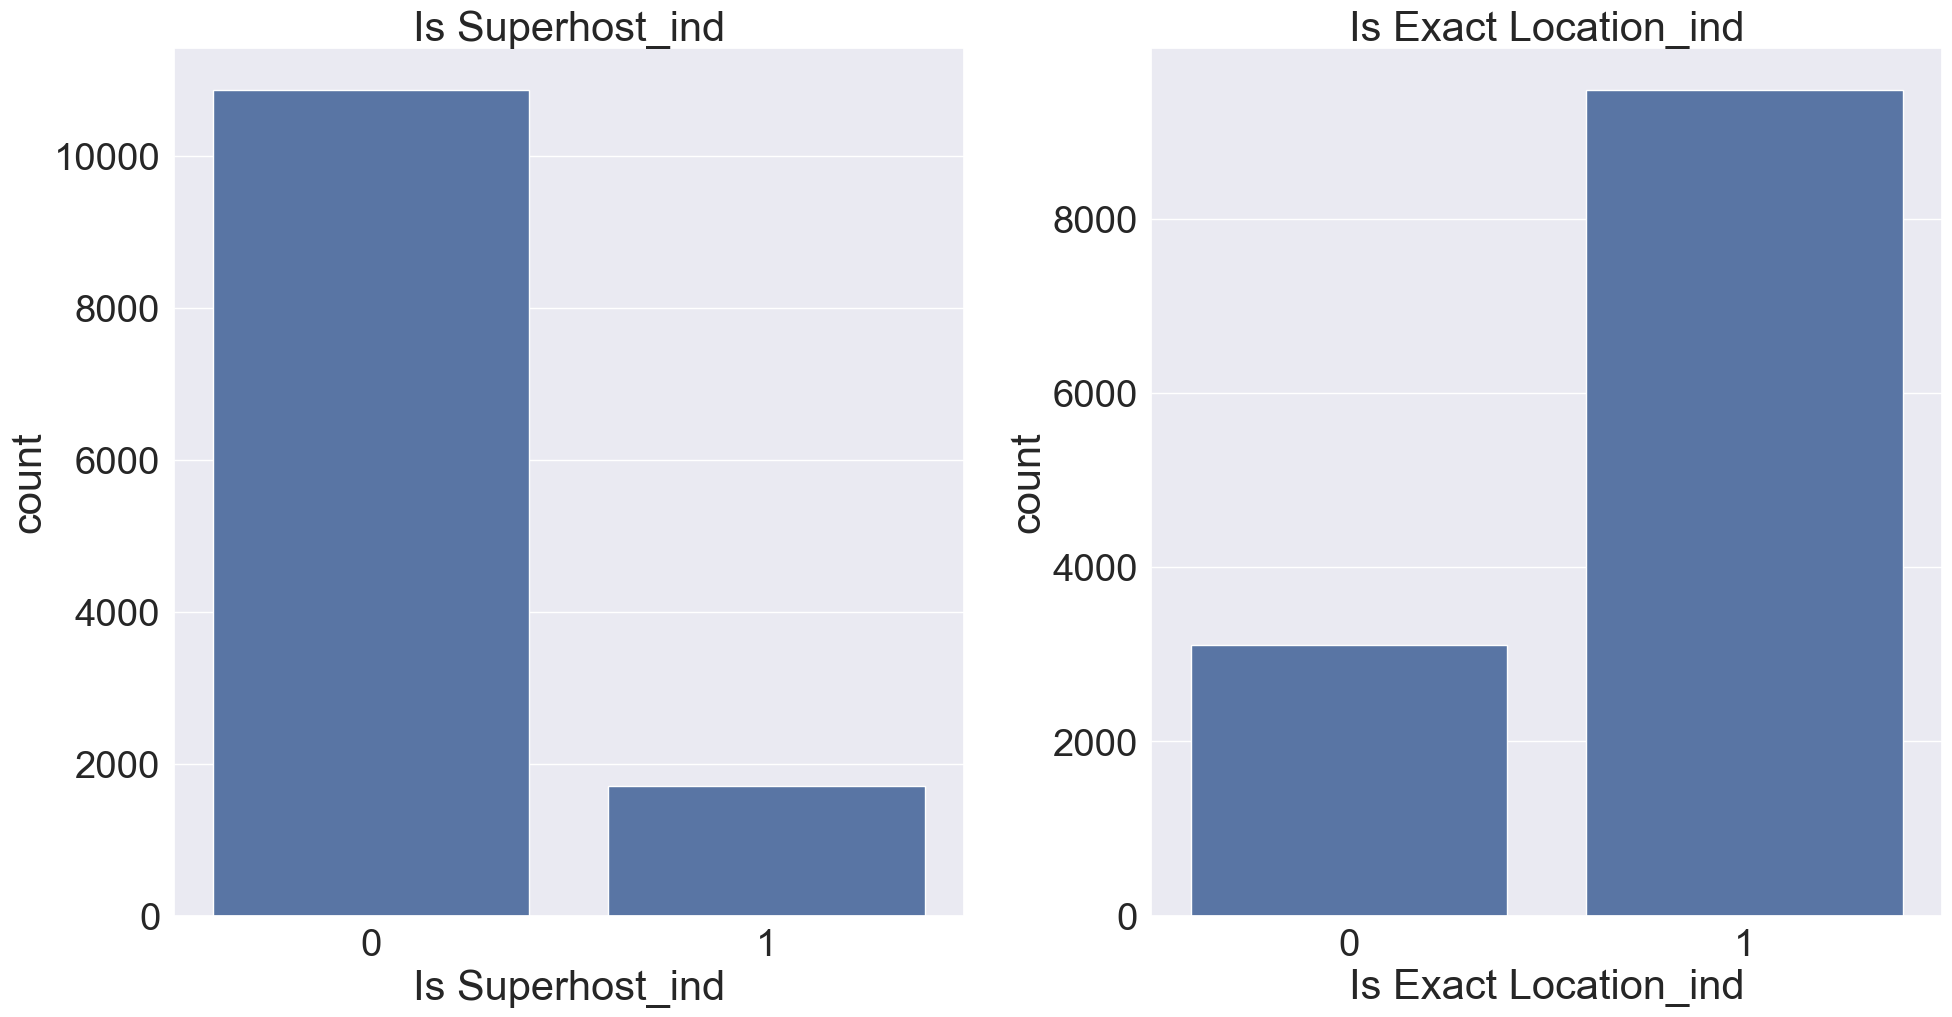

In [71]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(hspace = 0.5)
sns.set(font_scale = 2.5)
for col in dum_df:
    
        plt.subplot(a, b, c)
        plt.title('{}'.format(col))
        plt.xlabel(col)
        sns.countplot(data=dum_df, x=col)
        c = c + 1
    
fig.tight_layout()
plt.show()

In [72]:
cols_cat= ['Neighborhood Group',  'Country Code','Room Type','Top10Neighbourhood', 'Property Type_groups']
cat_df = df_eda[cols_cat]
cat_df

Neighborhood Group    Country Code    Room Type      \
65536                      Mitte      DE       Entire home/apt   
65603                  NeukÃ¶lln      DE       Entire home/apt   
65625                      Mitte      DE          Private room   
65626       Charlottenburg-Wilm.      DE          Private room   
65627                     Pankow      DE          Private room   
...                          ...          ...              ...   
456582       Treptow - KÃ¶penick      DE       Entire home/apt   
456585               Lichtenberg      DE          Private room   
456605  Friedrichshain-Kreuzberg      DE       Entire home/apt   
456954  Friedrichshain-Kreuzberg      DE       Entire home/apt   
456958                     Mitte      DE       Entire home/apt   

       Top10Neighbourhood Property Type_groups  
65536              Mitte        Apartment       
65603          NeukÃ¶lln        Apartment       
65625              Mitte        Apartment       
65626     Charlottenburg        Apartment       
65627    Prenzlauer Berg        Apartment       
...                   ...                  ...  
456582             Other        Apartment       
456585             Other        Apartment       
456605         Kreuzberg        Apartment       
456954    Friedrichshain        Apartment       
456958           Wedding        Apartment       

[12583 rows x 5 columns]

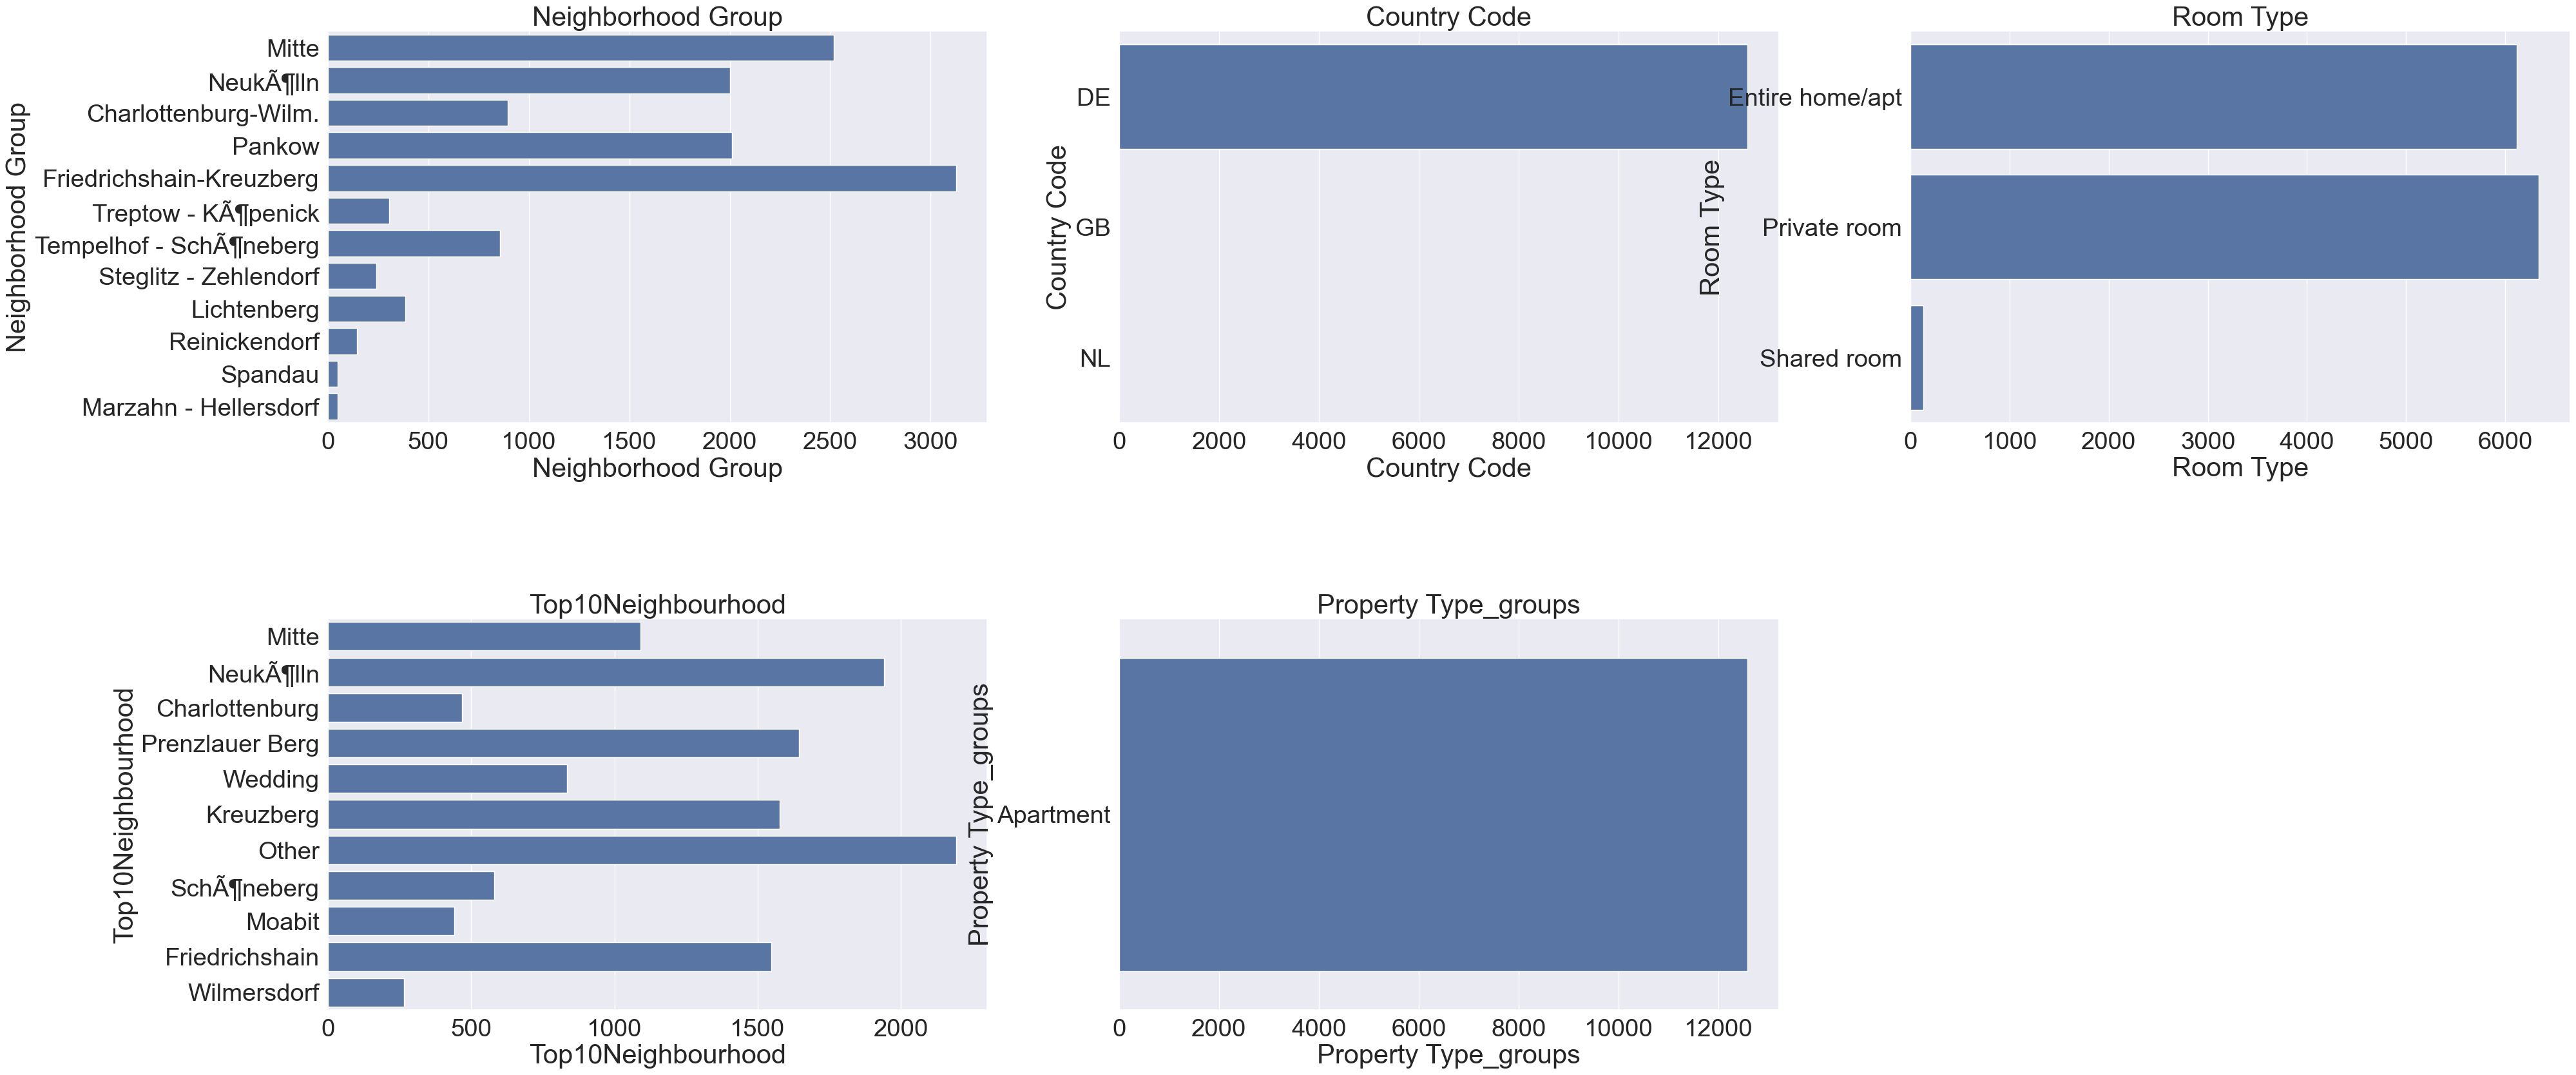

In [73]:
a = 3  # number of rows
b = 3  # number of columns
c = 1  # plot counter

fig = plt.figure(figsize=(40,30))
plt.subplots_adjust(hspace = 0.5)
sns.set(font_scale = 2.5)
for i in cat_df:

        plt.subplot(a, b, c)
        plt.title('{}'.format(i))
        plt.xlabel(i)
        sns.countplot(cat_df[i])
        c = c + 1

plt.show()

In [74]:
cols= [
    'Accomodates',
    'Bathrooms', 
    'Bedrooms', 
    'Beds', 
    'Guests Included', 
    'Min Nights', 
    'Reviews', 
    'Overall Rating', 
    'Accuracy Rating',
    'Cleanliness Rating', 
    'Checkin Rating', 
    'Communication Rating',
    'Location Rating', 
    'Value Rating'    
      ]
con_df = df_eda[cols]
y= df_eda[df_eda['Price'].notnull() & (df_eda['Price'] > 0)]
y[['Price']].describe()

Price   
count  12583.000000
mean      61.649607
std      137.155311
min        1.000000
25%       32.000000
50%       48.000000
75%       70.000000
max     9000.000000

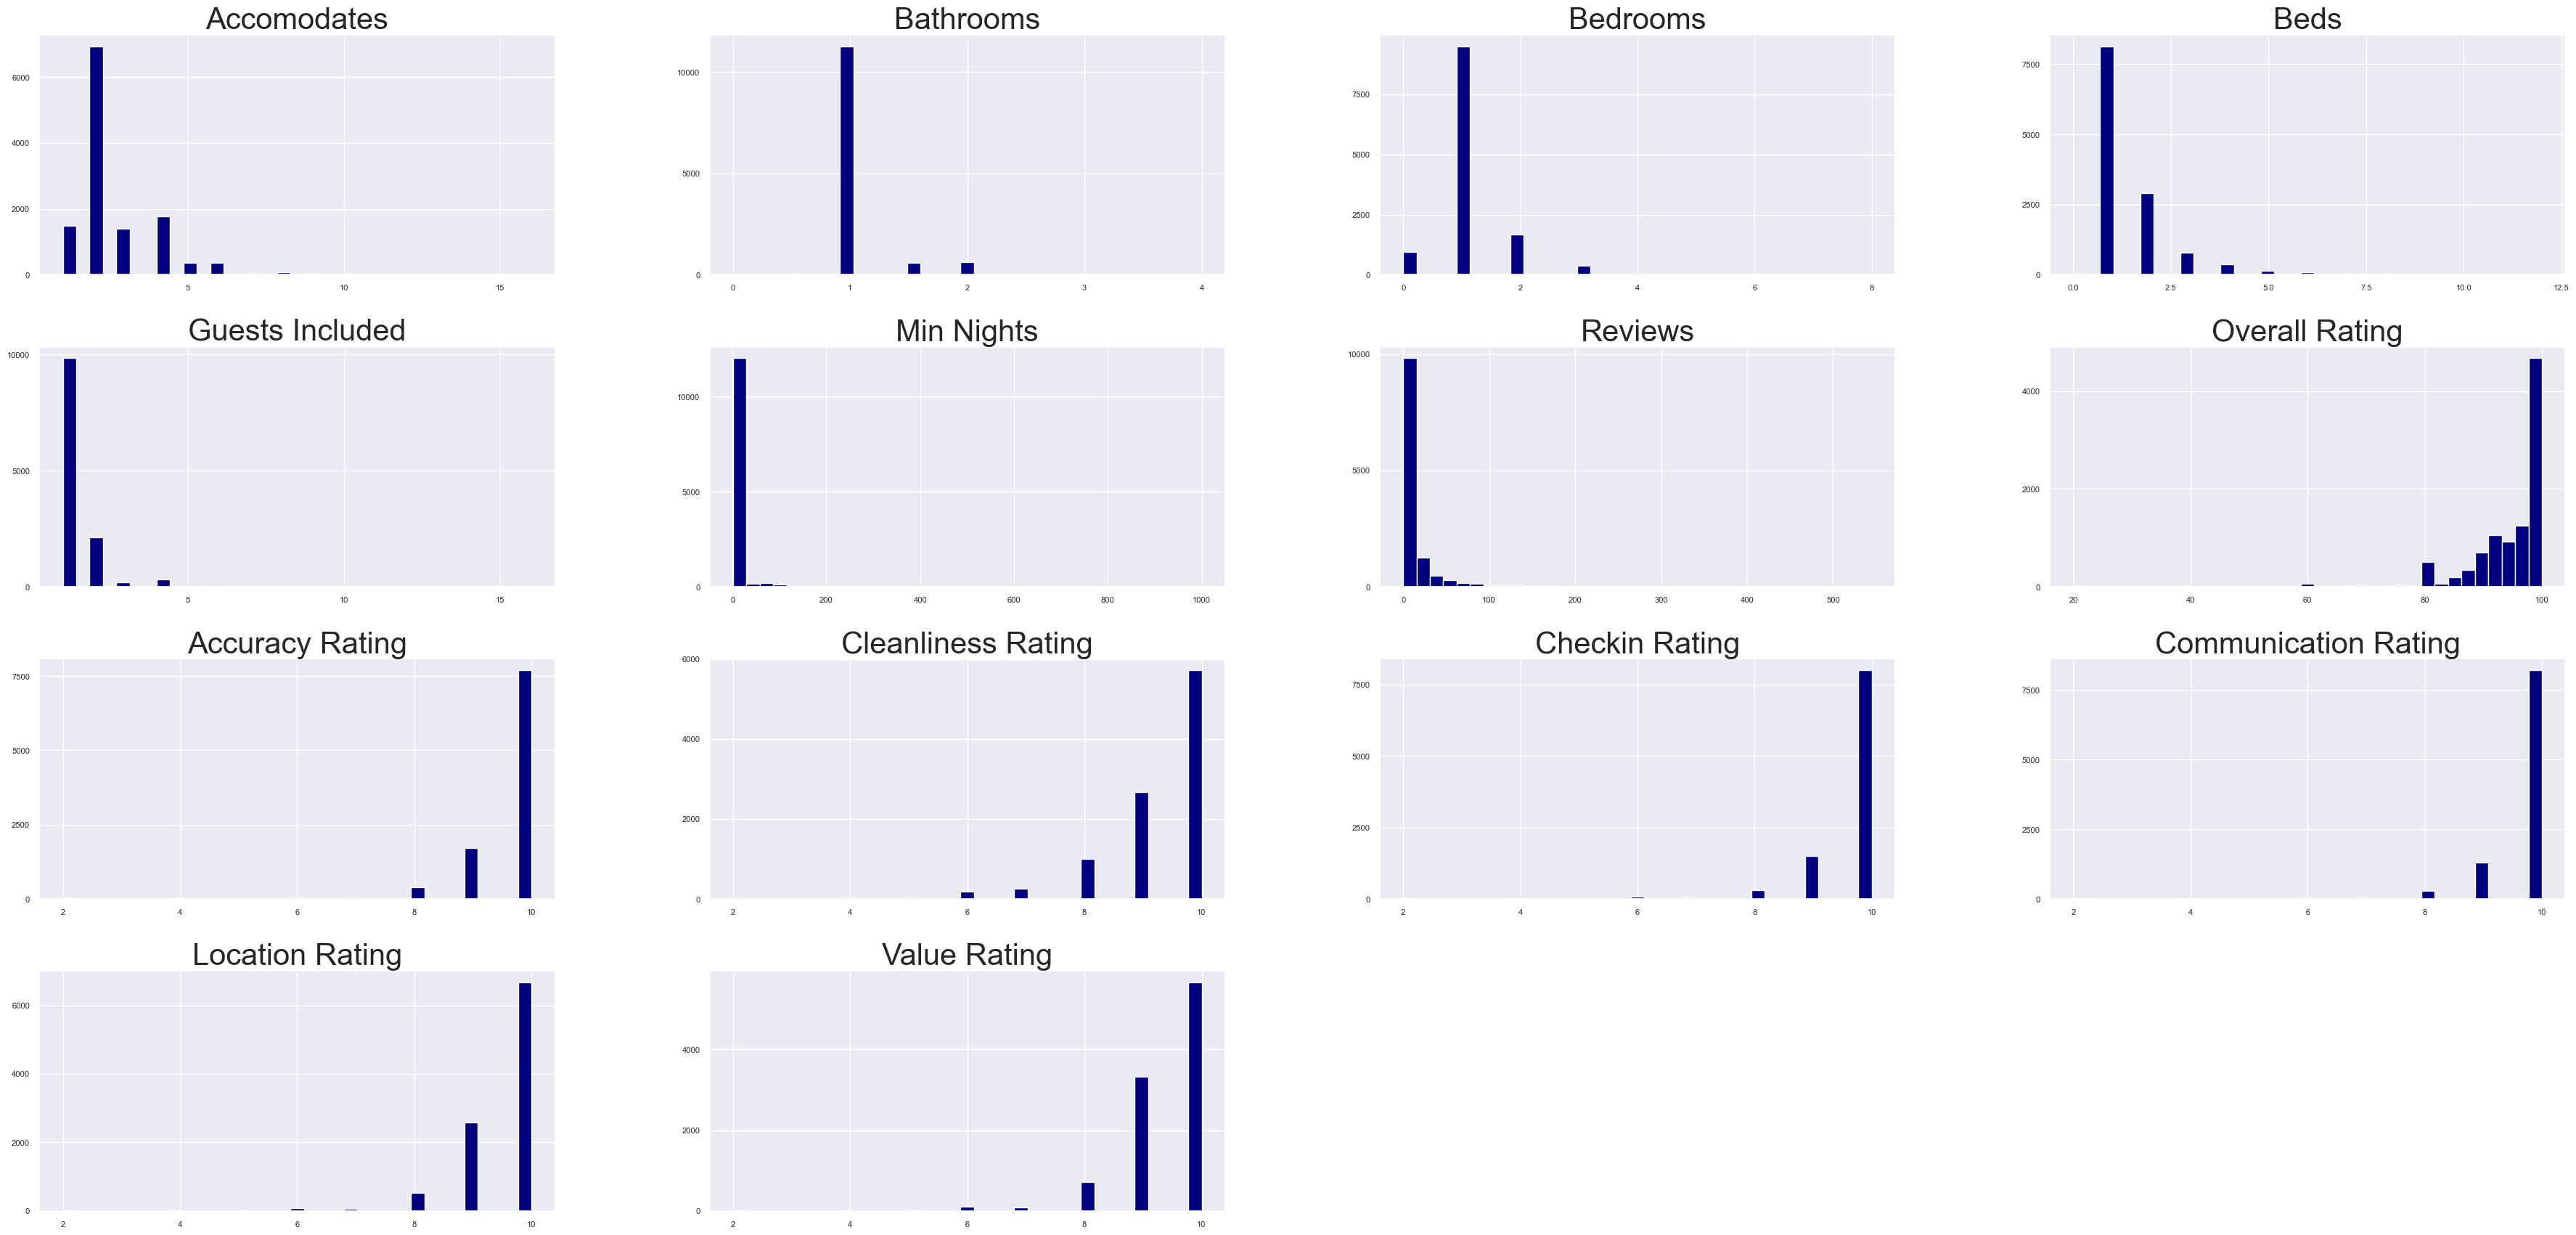

In [75]:
con_df.hist(figsize=(40, 20), bins=35, xlabelsize=8, ylabelsize=8, color = "navy");

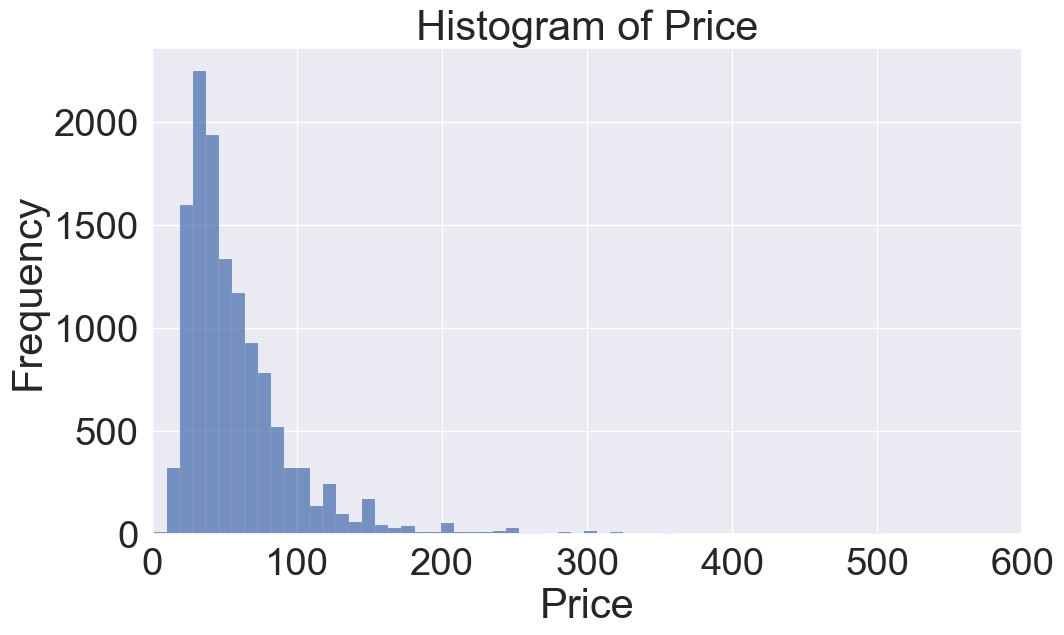

In [76]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(y['Price'], kde=False, bins=1000)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 600)  # Set x-axis limit from 0 to 1000
plt.show()

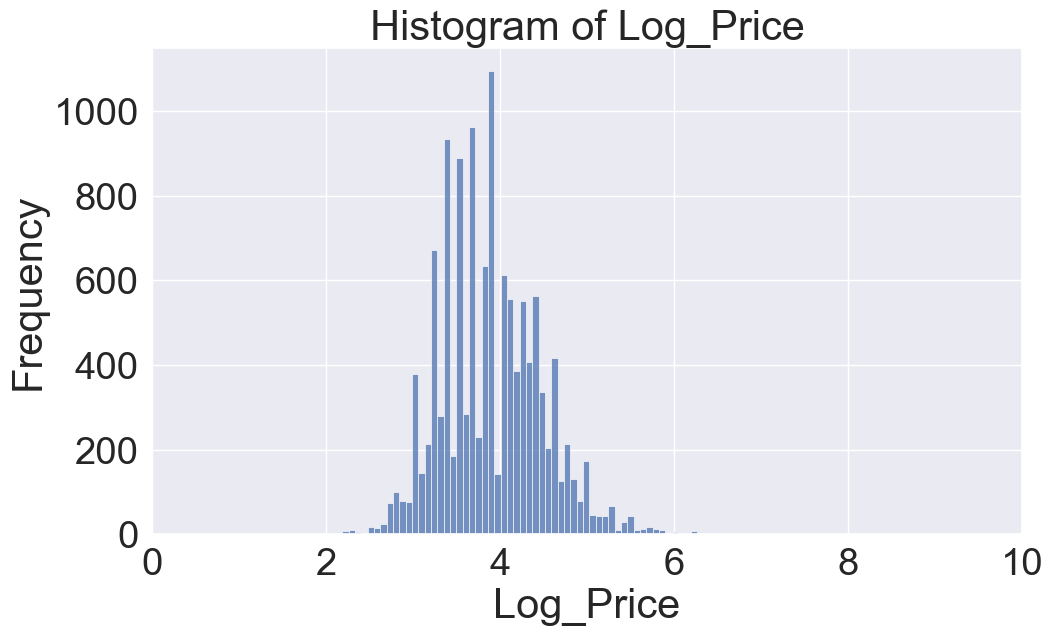

In [77]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(np.log(y['Price']), kde=False, bins=125)
plt.title('Histogram of Log_Price')
plt.xlabel('Log_Price')
plt.ylabel('Frequency')
plt.xlim(0, 10)  # Set x-axis limit from 0 to 1000
plt.show()

y['Log_Price'] = np.log(y['Price'])


In [78]:

cols_cat= ['Neighborhood Group',  'Country Code','Room Type','Top10Neighbourhood', 'Property Type_groups',  'Host Response Time', 'neighbourhood','City' ]
df1=df_eda.drop(cols_cat, axis=1)
df1.corr()


Host Response Rate  Accomodates  Bathrooms  Bedrooms  \
Host Response Rate          1.000000        0.070001    0.028648   0.035956   
Accomodates                 0.070001        1.000000    0.253556   0.626438   
Bathrooms                   0.028648        0.253556    1.000000   0.302668   
Bedrooms                    0.035956        0.626438    0.302668   1.000000   
Beds                        0.059219        0.793124    0.269398   0.625028   
Price                       0.050228        0.186519    0.079433   0.140170   
Guests Included             0.079033        0.522615    0.198898   0.375067   
Min Nights                 -0.024347        0.001160    0.000394   0.022190   
Reviews                     0.111907        0.103030    0.013570   0.031251   
Overall Rating              0.053805       -0.055772    0.016604   0.000896   
Accuracy Rating             0.040993       -0.047908    0.001330  -0.016408   
Cleanliness Rating          0.093509       -0.003008    0.006022   0.026166   
Checkin Rating              0.061614       -0.023189   -0.003823   0.005970   
Communication Rating        0.082380       -0.027448   -0.008164  -0.007062   
Location Rating             0.028066       -0.033946    0.003944  -0.020559   
Value Rating                0.039356       -0.100227    0.005498  -0.021056   
Is Superhost_ind            0.166864        0.034330    0.018285   0.025372   
Is Exact Location_ind       0.053322        0.035584    0.029281   0.030305   

                         Beds      Price   Guests Included  Min Nights  \
Host Response Rate     0.059219  0.050228     0.079033      -0.024347    
Accomodates            0.793124  0.186519     0.522615       0.001160    
Bathrooms              0.269398  0.079433     0.198898       0.000394    
Bedrooms               0.625028  0.140170     0.375067       0.022190    
Beds                   1.000000  0.155513     0.473643       0.020860    
Price                  0.155513  1.000000     0.123500       0.015546    
Guests Included        0.473643  0.123500     1.000000      -0.008644    
Min Nights             0.020860  0.015546    -0.008644       1.000000    
Reviews                0.086998  0.013310     0.107710      -0.030247    
Overall Rating        -0.063193 -0.033496    -0.017558       0.000200    
Accuracy Rating       -0.058015 -0.090561    -0.002403      -0.001146    
Cleanliness Rating    -0.007725 -0.021615     0.017461       0.009469    
Checkin Rating        -0.030620  0.011144     0.011214      -0.008355    
Communication Rating  -0.039516  0.014436     0.003139      -0.002479    
Location Rating       -0.047625  0.006391    -0.008146      -0.012895    
Value Rating          -0.089464 -0.065628    -0.046965      -0.023615    
Is Superhost_ind       0.017709  0.015765     0.066675      -0.001438    
Is Exact Location_ind  0.026990  0.014711     0.019899       0.031504    

                        Reviews  Overall Rating  Accuracy Rating  \
Host Response Rate     0.111907     0.053805        0.040993       
Accomodates            0.103030    -0.055772       -0.047908       
Bathrooms              0.013570     0.016604        0.001330       
Bedrooms               0.031251     0.000896       -0.016408       
Beds                   0.086998    -0.063193       -0.058015       
Price                  0.013310    -0.033496       -0.090561       
Guests Included        0.107710    -0.017558       -0.002403       
Min Nights            -0.030247     0.000200       -0.001146       
Reviews                1.000000     0.001693        0.054874       
Overall Rating         0.001693     1.000000        0.678782       
Accuracy Rating        0.054874     0.678782        1.000000       
Cleanliness Rating     0.084496     0.696140        0.538677       
Checkin Rating         0.059494     0.523726        0.523660       
Communication Rating   0.048045     0.590188        0.562883       
Location Rating        0.051186     0.425254        0.393471       
Value Rating           0.0

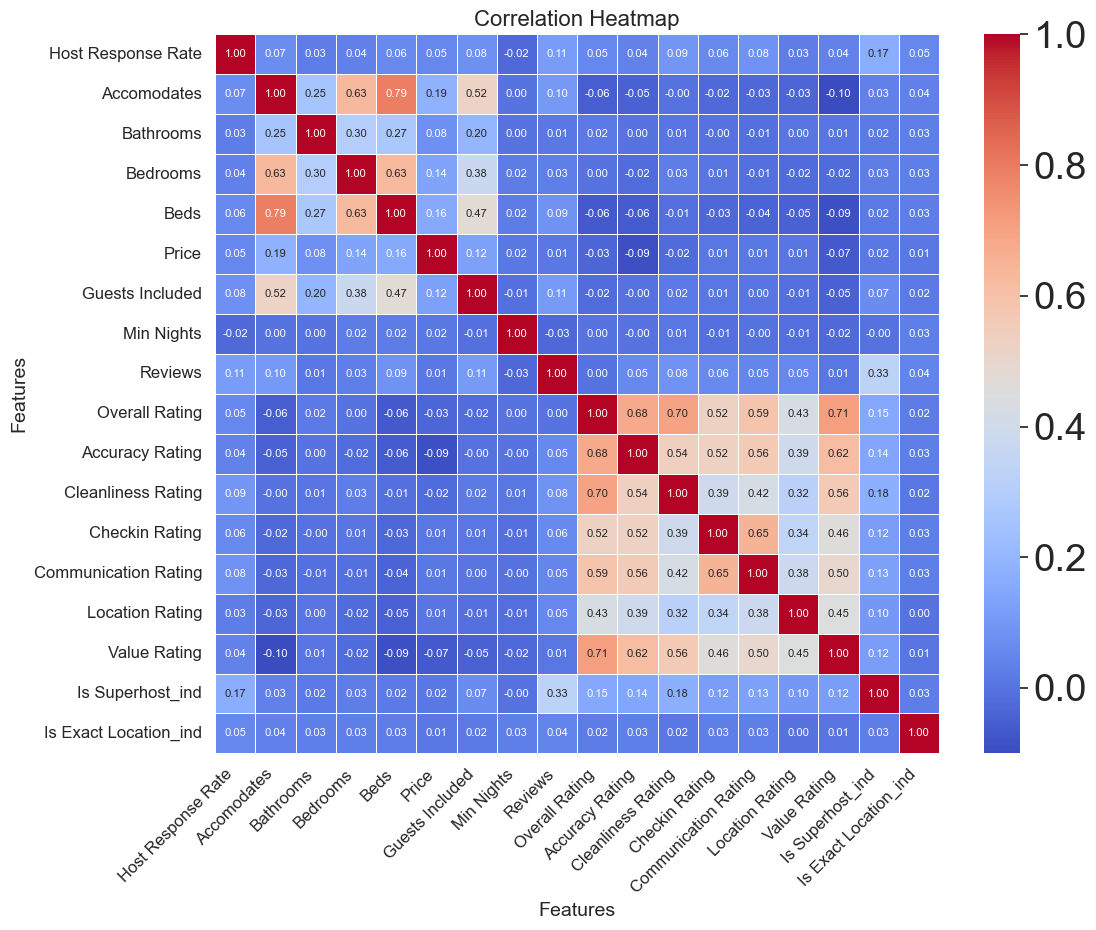

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df1.corr()

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(12, 10))  # Increase figure size

# Create the heatmap with annotations
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})

# Set the title for the heatmap and adjust font size
plt.title('Correlation Heatmap', fontsize=16)

# Set x and y labels and adjust font size
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Adjust tick labels font size and rotation
ax.tick_params(axis='both', labelsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal

# Adjust layout to make room for rotated labels
plt.tight_layout()

# Show the plot
plt.show()


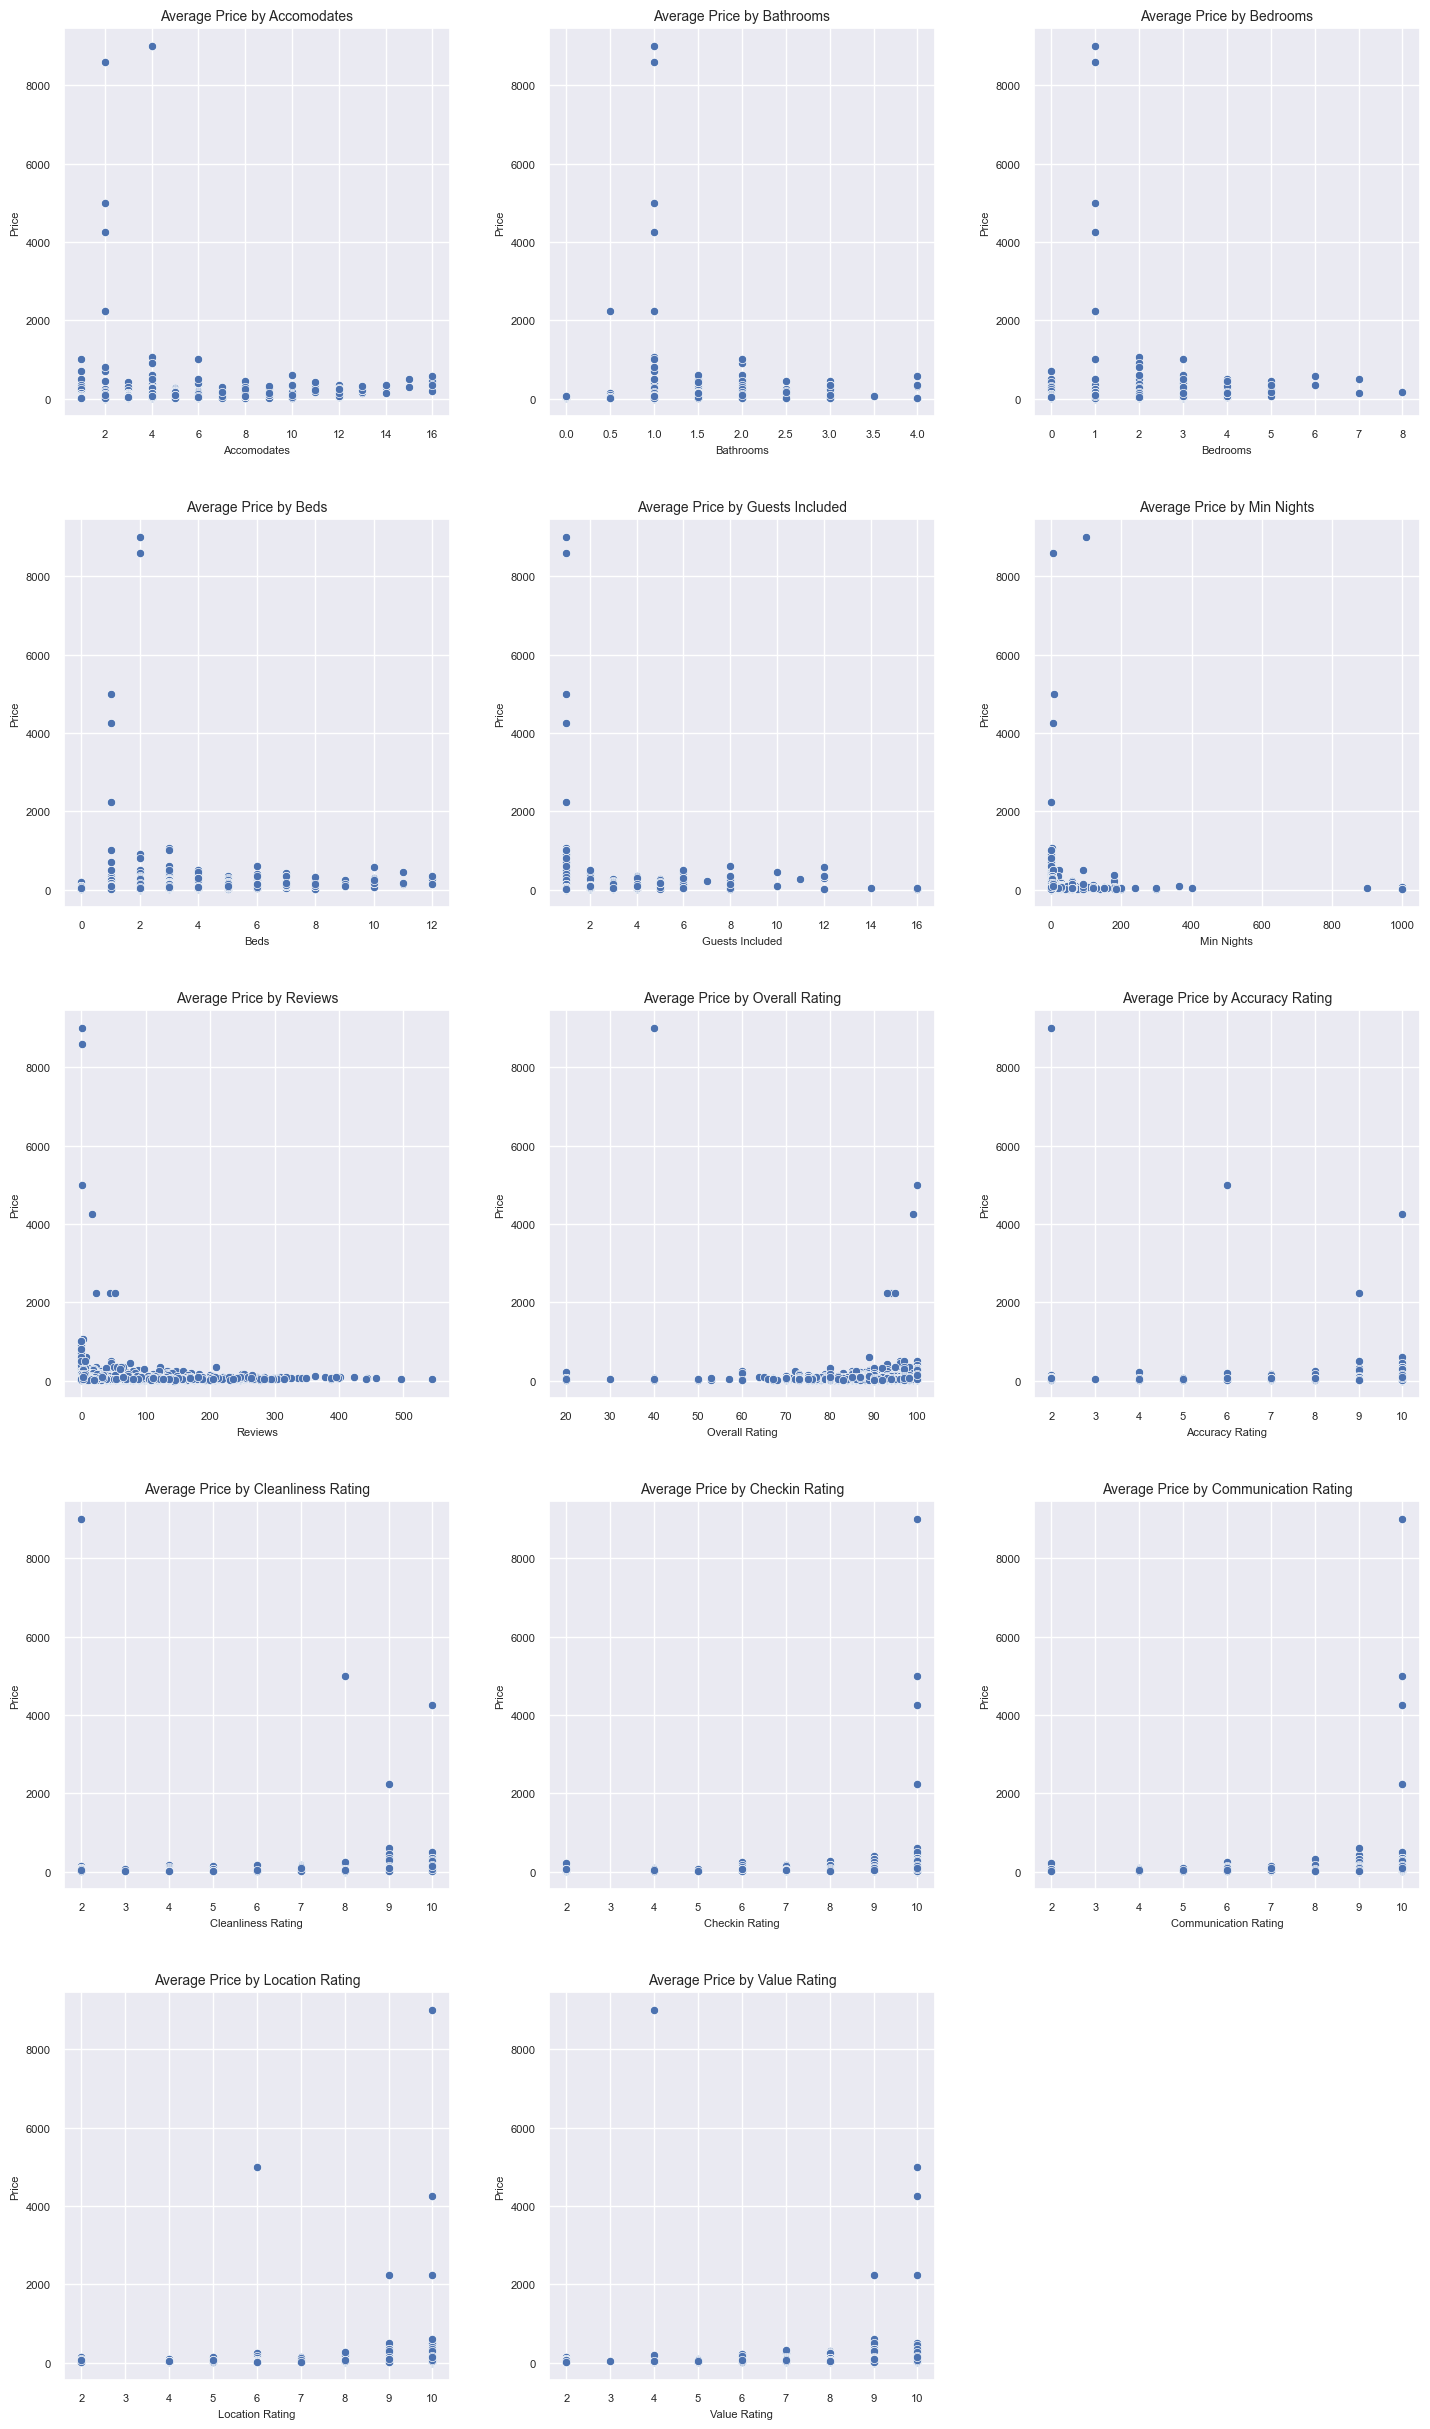

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_columns= [
    'Accomodates',
    'Bathrooms', 
    'Bedrooms', 
    'Beds', 
    'Guests Included', 
    'Min Nights', 
    'Reviews', 
    'Overall Rating', 
    'Accuracy Rating',
    'Cleanliness Rating', 
    'Checkin Rating', 
    'Communication Rating',
    'Location Rating', 
    'Value Rating'    
      ]
# Assuming df is your DataFrame and 'Price' is your target column
#numerical_columns = df_eda.select_dtypes(include=['int64', 'float64']).columns
#numerical_columns = numerical_columns.drop('Price')  # Exclude target column if present

# Set up the matplotlib figure
n_cols = 3  # Number of columns in the grid
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate over numerical columns and create scatter plots
for i, col in enumerate(numerical_columns):
    sns.scatterplot(x=df_eda[col], y=df_eda['Price'], ax=axes[i])
    axes[i].set_title(f'Average Price by {col}', fontsize=10)  # Smaller title
    axes[i].set_xlabel(col, fontsize=8)  # Smaller x-axis label
    axes[i].set_ylabel('Price', fontsize=8)  # Smaller y-axis label
    axes[i].tick_params(axis='both', which='major', labelsize=8)  # Smaller axis numbers

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


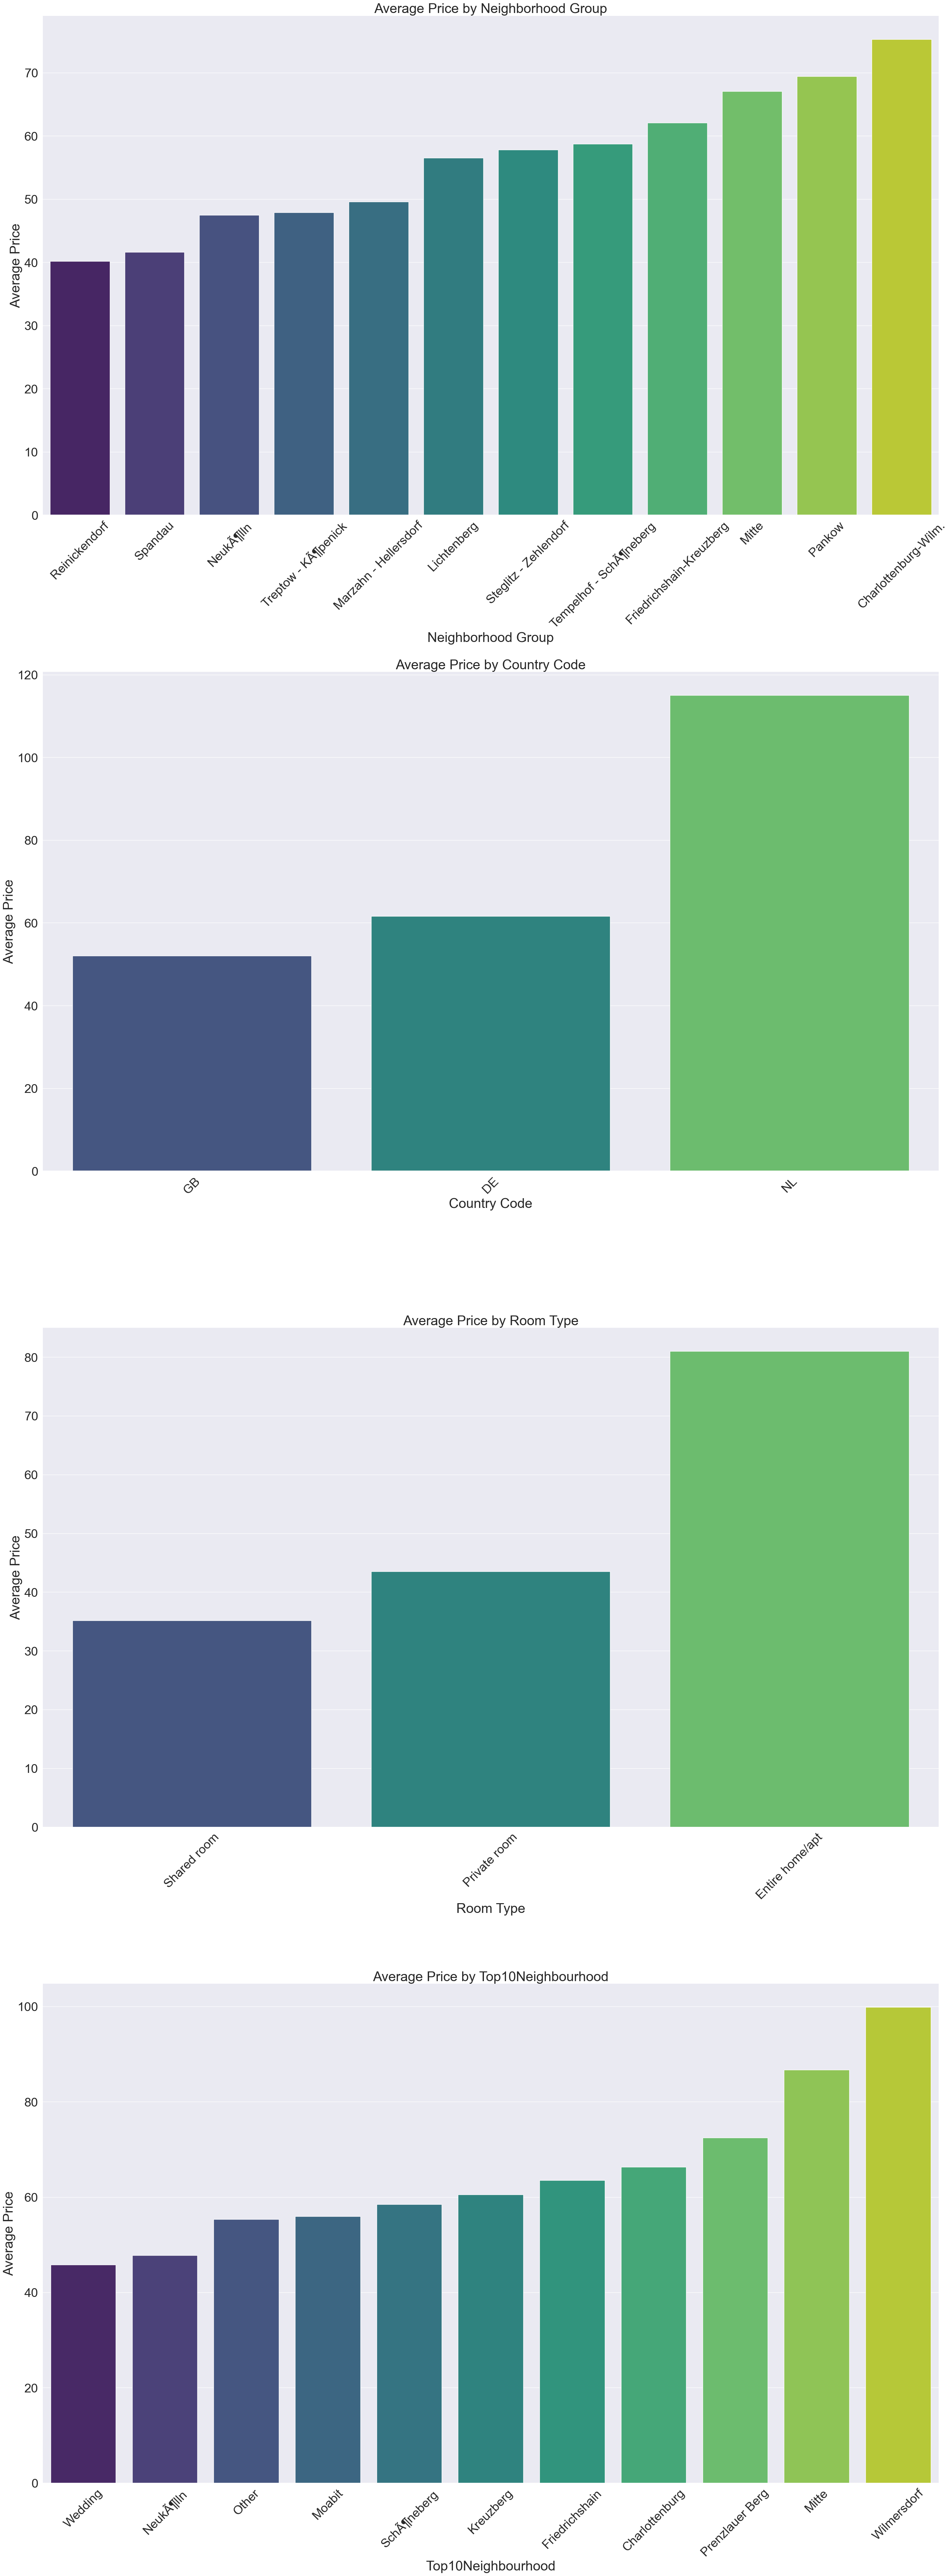

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_eda is your DataFrame and 'Price' is your target column
categorical_columns =  ['Neighborhood Group', 'Country Code', 'Room Type', 'Top10Neighbourhood']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(30, 80))

for i, col in enumerate(categorical_columns):
    # Calculate average price for each category and sort by ascending order of average price
    avg_price = df_eda.groupby(col)['Price'].mean().reset_index().sort_values(by='Price', ascending=True)
    
    # Create bar plot
    sns.barplot(x=col, y='Price', data=avg_price, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Average Price by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Average Price')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if necessary

# Adjust layout
plt.tight_layout()
plt.show()


In [82]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default  
pd.DataFrame(con_df.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

#y['Log_Price']

In [86]:


pd.DataFrame(y[['Log_Price','Price']].skew(),columns=['skewness']).style.applymap(highlight)
#y['Log_Price']